In [1]:
"""
Name: Thakkar Sumit Lalitkumar
RollNo:35
Subject: Machine Learning
Course: MCA - II
"""

'\nName: Thakkar Sumit Lalitkumar\nRollNo:35\nSubject: Machine Learning\nCourse: MCA - II\n'

## Use the iris dataset in Sklearn to build a KNN model to classify different types of iris flowers. Evaluate its performance using cross-validation.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans

In [3]:
iris = load_iris()

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
data = pd.DataFrame(data = iris.data, columns = iris.feature_names)
data['target'] = iris.target 

In [6]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [8]:
data.drop_duplicates(inplace=True)

<AxesSubplot:>

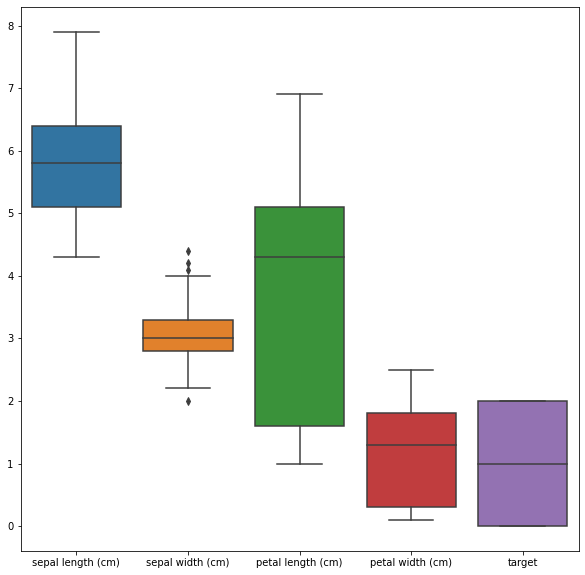

In [9]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  149 non-null    float64
 1   sepal width (cm)   149 non-null    float64
 2   petal length (cm)  149 non-null    float64
 3   petal width (cm)   149 non-null    float64
 4   target             149 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 6.4 KB


In [11]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631,0.993289
std,0.830851,0.436342,1.767791,0.762622,0.817847
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.300000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


C:\Users\Sumit Thakkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

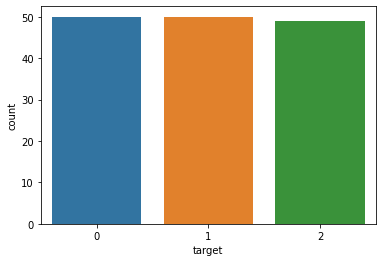

In [12]:
sns.countplot(data['target'])

In [13]:
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [14]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data[['sepal length (cm)', 'sepal width (cm)', 
                'petal length (cm)','petal width (cm)']])
data1 = pd.DataFrame(scaled_features, columns = ['sepal length (cm)', 'sepal width (cm)', 
                'petal length (cm)','petal width (cm)'])

In [15]:
data1['target'] = data['target']

In [16]:
data.head(7)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0


In [17]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631,0.993289
std,0.830851,0.436342,1.767791,0.762622,0.817847
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.300000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<AxesSubplot:>

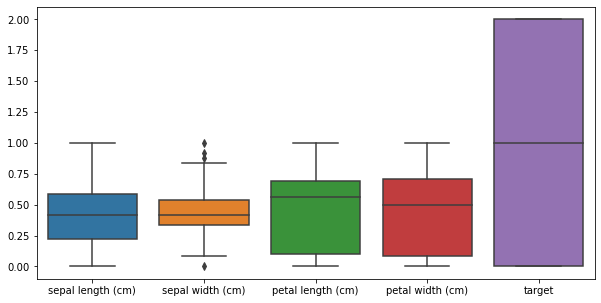

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data1)

In [19]:
# handling outliers

In [20]:
def cal_ouliers(dataFrame,column):
    q1 =  dataFrame[column].quantile(0.25)
    q3 =  dataFrame[column].quantile(0.75)
    iqr = q3 - q1
    lb = q1 - 1.5*iqr
    ub = q3 + 1.5*iqr
    return lb, ub

In [21]:
for i in data1:
    lowerBound,upperBound = cal_ouliers(data1,i)
    data1[i].clip(lowerBound,upperBound, inplace = True)

<AxesSubplot:>

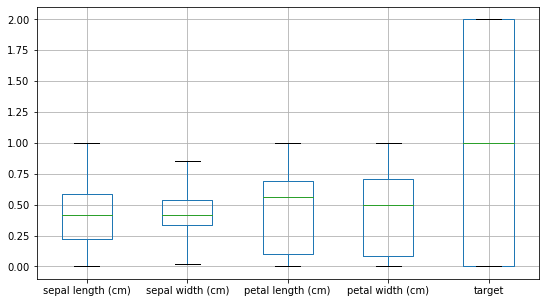

In [22]:
data1.boxplot(figsize=(9,5))

# Features selection

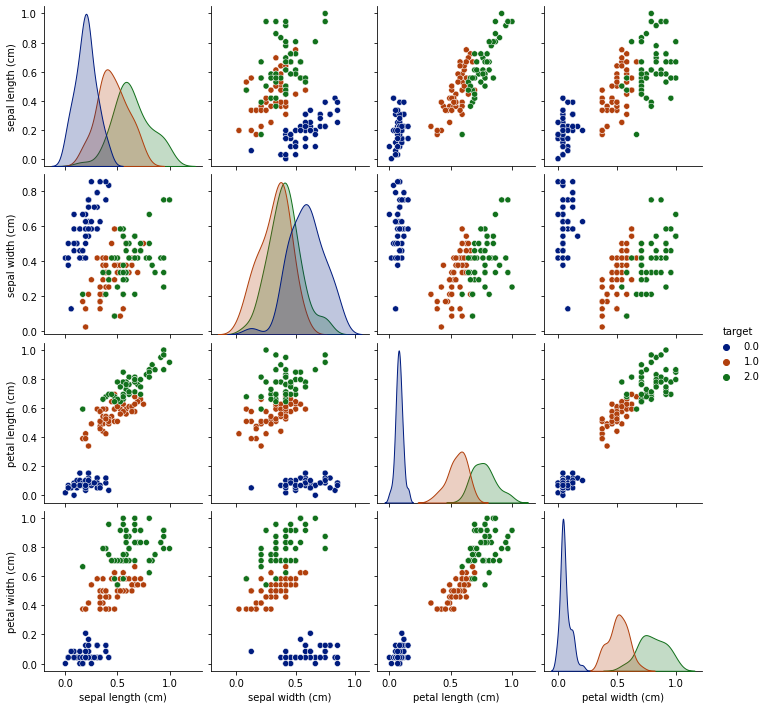

In [23]:
sns.pairplot(data1, kind='scatter' , hue='target', palette='dark')

<AxesSubplot:>

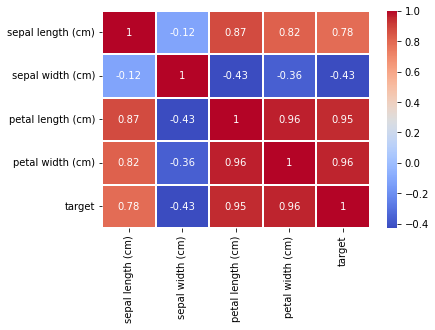

In [24]:
sns.heatmap(data1.corr(),annot=True,cmap='coolwarm',linewidths=1.5)

In [25]:
X = data1[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
y = data1[['target']]

# Splitting training and testing datasets

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Find ideal no of cluesters using elbow method

In [27]:
wcss = []
for i in range(1,11):
    KmeansModel = KMeans(n_clusters=i)
    KmeansModel.fit(X)
    wcss.append(KmeansModel.inertia_)

C:\Users\Sumit Thakkar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [28]:
wcss

[40.7727833072296,
 11.93589363399931,
 6.76807050872616,
 5.325428071131431,
 4.4340418383462845,
 3.774601347307335,
 3.356776343958689,
 3.0410751536471317,
 2.751877340494901,
 2.4499160926234658]

Text(0, 0.5, 'Within Sum Of Square Errors')

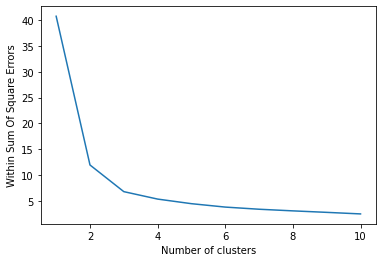

In [29]:
plt.plot(range(1,11),wcss)
plt.xlabel("Number of clusters")
plt.ylabel("Within Sum Of Square Errors")

In [30]:
# From above graph we can see that ideal no of clusters are 3.

In [31]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)

C:\Users\Sumit Thakkar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [32]:
predict = model.predict(X_test)

In [33]:
predict

array([1., 0., 2., 1., 1., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0., 1., 2.,
       1., 1., 2., 0., 2., 0., 2., 2., 2., 2., 2., 0., 0., 0., 0., 1., 0.,
       0., 2., 1., 0., 0., 0., 2., 1., 1., 0., 0., 1., 2., 2., 1., 2.])

In [34]:
y_test.fillna(0,inplace=True)

In [35]:
print("Confusion matrix.....")
print(confusion_matrix(y_test, predict))

Confusion matrix.....
[[19  0  1]
 [ 0 15  0]
 [ 0  0 15]]


In [36]:
print("Classification report...")
print(classification_report(y_test,predict))

Classification report...
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97        20
         1.0       1.00      1.00      1.00        15
         2.0       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [37]:
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

# Cross Validation

Text(0, 0.5, 'target')

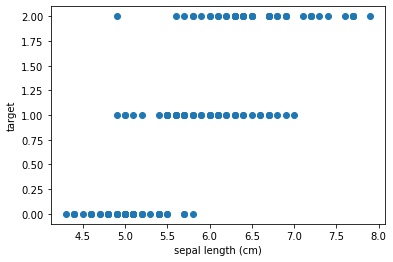

In [38]:
plt.scatter(data['sepal length (cm)'],data['target'],cmap='coolwarm')
plt.xlabel('sepal length (cm)')
plt.ylabel('target')

Text(0, 0.5, 'target')

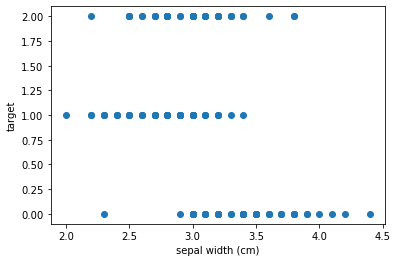

In [39]:
plt.scatter(data['sepal width (cm)'],data['target'],cmap='coolwarm')
plt.xlabel('sepal width (cm)')
plt.ylabel('target')

Text(0, 0.5, 'target')

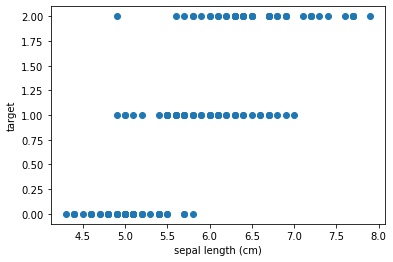

In [40]:
plt.scatter(data['sepal length (cm)'],data['target'],cmap='coolwarm')
plt.xlabel('sepal length (cm)')
plt.ylabel('target')

Text(0, 0.5, 'target')

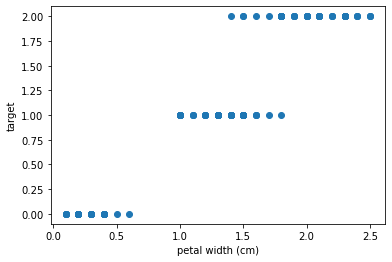

In [41]:
plt.scatter(data['petal width (cm)'],data['target'],cmap='coolwarm')
plt.xlabel('petal width (cm)')
plt.ylabel('target')

In [42]:
new_x = [[0.25,0.15,0.12,0.55]]

In [43]:
model.predict(new_x)

C:\Users\Sumit Thakkar\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1.])